In [4]:
import tensorflow as tf
import tensorflow_hub as hub
#get image
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO
#draw on the image
import numpy as np
from PIL import Image as IMG
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

In [ ]:
from google.colab import drive
from google.colab import files

from io import BytesIO

drive.mount('/content/gdrive/')

# data_dir = '/content/gdrive/My Drive/images/standing/'
# data_dir = pathlib.path(data_dir)

#PATH_OF_DATA = '/content/gdrive/"My Drive"/total/'

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Define functions

In [ ]:
def display_image(image):
  fig = plt.figure(figsize=(15, 10))
  plt.grid(False)
  plt.imshow(image)



def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  """Adds a bounding box to an image."""
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  colors = list(ImageColor.colormap.values())
  dog_coord = []

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      if (class_names[i].decode("ascii") == "Dog") :
        dog_coord.append([xmin, ymin, xmax, ymax])
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = IMG.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  display_image(image)
  
  return dog_coord

In [ ]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [ ]:
def run_detector(detector, path):
  img = load_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  # start_time = time.time()
  result = detector(converted_img)
  # end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

  print("Found %d objects." % len(result["detection_scores"]))
  

  coord = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  # display_image(image_with_boxes)
  return coord

# import module

In [ ]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1" #@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]

detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


# Execute

/content/gdrive/My Drive/images/lying/00000079.jpg
Found 100 objects.
detector 실행 완료


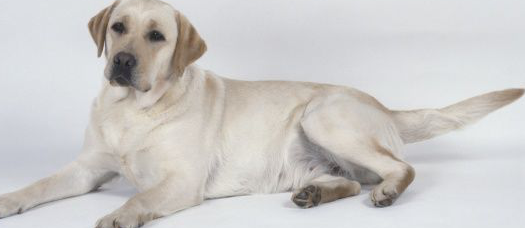

saved file name : /content/gdrive/My Drive/imgfortrain/lying/00000079_update.jpeg
/content/gdrive/My Drive/images/lying/00000102.jpg
Found 100 objects.
detector 실행 완료


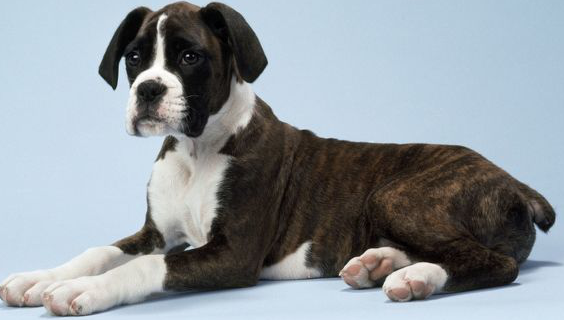

saved file name : /content/gdrive/My Drive/imgfortrain/lying/00000102_update.jpeg
/content/gdrive/My Drive/images/lying/00000125.jpg
Found 100 objects.
detector 실행 완료


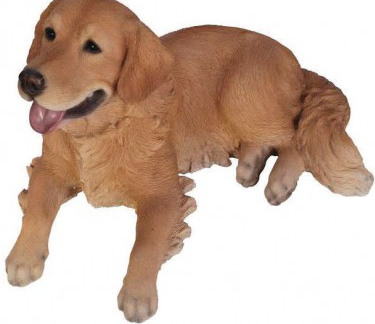

saved file name : /content/gdrive/My Drive/imgfortrain/lying/00000125_update.jpeg
/content/gdrive/My Drive/images/lying/00000139.jpg
Found 100 objects.
detector 실행 완료


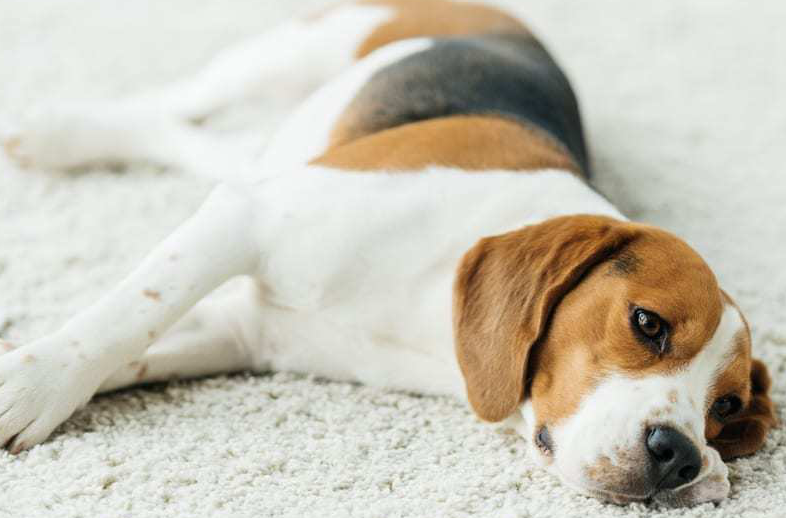

saved file name : /content/gdrive/My Drive/imgfortrain/lying/00000139_update.jpeg
/content/gdrive/My Drive/images/lying/00000170.jpg
Found 100 objects.
detector 실행 완료


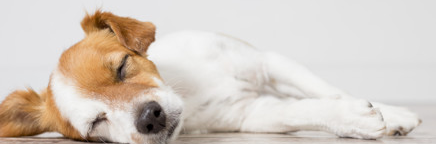

saved file name : /content/gdrive/My Drive/imgfortrain/lying/00000170_update.jpeg
/content/gdrive/My Drive/images/lying/00000252.jpg
Found 100 objects.
detector 실행 완료


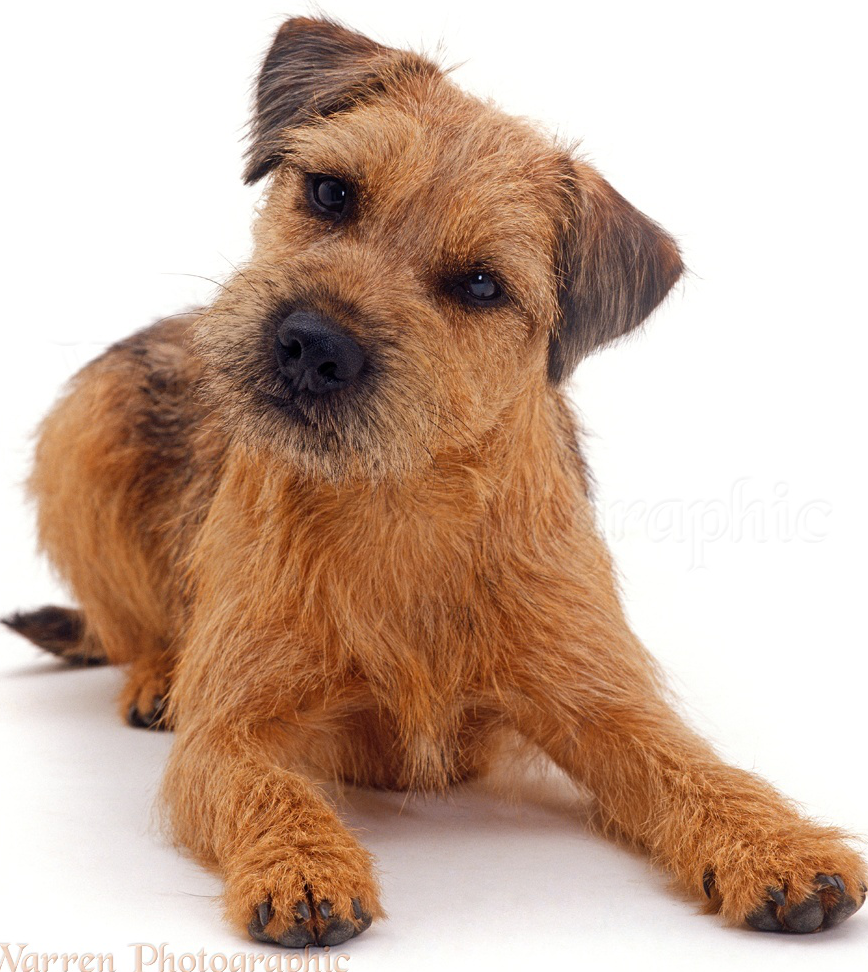

saved file name : /content/gdrive/My Drive/imgfortrain/lying/00000252_update.jpeg
/content/gdrive/My Drive/images/lying/00000340.jpg
Found 100 objects.
detector 실행 완료


In [ ]:
from IPython.display import Image as IMAGE
# fname = '/content/gdrive/My Drive/images/standing/00000012.jpg'
import glob
for fname in glob.glob('/content/gdrive/My Drive/images/**/*.jpg', recursive=True) :
  try :
    print(fname)
#fname = '/content/gdrive/My Drive/00000179.jpg'
    img = IMG.open(fname)
    if (img.mode != "RGB") :
      img.convert("RGB")
      print("changed to RGB")
      print(img.mode)
      img.save(fname, format="JPEG", quality=90)

    #display(img)
    coord = run_detector(detector, fname)
    print("detection complete")
    #print (coord)
    '''
    im = IMG.open(fname)
    if (im.mode != "RGB") :
      im.convert("RGB")
    w,h = im.size
    '''

    w,h = img.size
    #print (w, h)
    # int화 해서 crop 
    temps = []
    # print("pre" , coord)
    for elem in coord : 
      temp = [0] * 4
      temp[0] = elem[0] * w
      temp[1] = elem[1] * h
      temp[2] = elem[2] * w
      temp[3] = elem[3] * h
      temps.append(temp)
    # print(temps)
    '''
    cropped_img = im.crop(temps[0])
    im.show()
    '''
    cropped_img = img.crop(temps[0])
    img.show()
    display (cropped_img)
    c_name = fname.replace(".jpg", "_update.jpeg")
    c_name = c_name.replace("images","imgfortrain")
    cropped_img.save(c_name, format="jpeg")
    # print("saved complete")
    print("saved file name : "+ c_name )
  except :
    print("something wrong with "+ fname)

In [5]:
tf.__version__

'2.2.0'